libarays

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score


# Load Census data into a DataFrame



In [2]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']
data = pd.read_csv(url, names=column_names, na_values=' ?')


# Preprocessing



In [3]:

data.dropna(inplace=True)
data['income'] = data['income'].apply(lambda x: 1 if x == ' >50K' else 0)  # Convert income to binary


# Split data into features and target and into train and test sets

In [4]:
X = data.drop('income', axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Naive Bayes Classifier

In [5]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train.select_dtypes(include='number'), y_train)


GaussianNB()

# Predict on test set and Compute Sensitivity and Specificity

In [6]:
y_pred = nb_classifier.predict(X_test.select_dtypes(include='number'))


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Sensitivity: 0.3202614379084967
Specificity: 0.9509216078170108


Compute Accuracy

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


# Plot Confusion Matrix

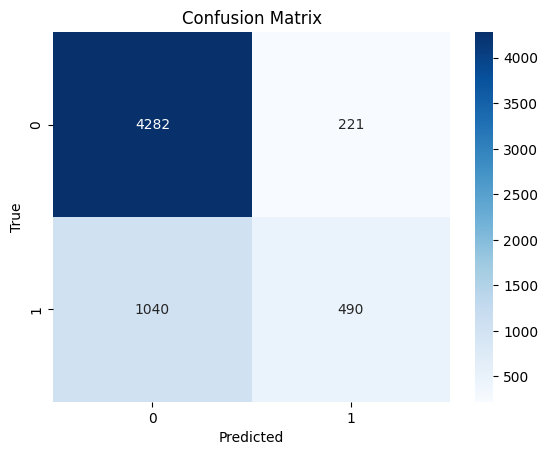

In [7]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



# Compute posterior probability




In [8]:

posterior_probability = nb_classifier.predict_proba(X_test.select_dtypes(include='number'))[:, 1]
print("Posterior Probability of making over 50K a year:", posterior_probability.mean())



Posterior Probability of making over 50K a year: 0.12646988719738647
